# Heart Disease

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")


In [4]:
print(df.head())      # Display first few rows
print(df.info())      # Get column data types and non-null counts
print(df.describe())  # Summary statistics


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [6]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


Check for Missing or Inconsistent Data

In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
df.duplicated().sum()

1

1. Identify Duplicate Rows

In [9]:
print(df[df.duplicated()])


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


2. Drop the Duplicate

In [10]:
df = df.drop_duplicates()


3. Keep Only the First Occurrence

In [11]:
df = df.drop_duplicates(keep='first')


4. Reset Index

In [12]:
df.reset_index(drop=True, inplace=True)


5: Data Distribution Analysis

1. Distribution of Age, Cholesterol, and Blood Pressure

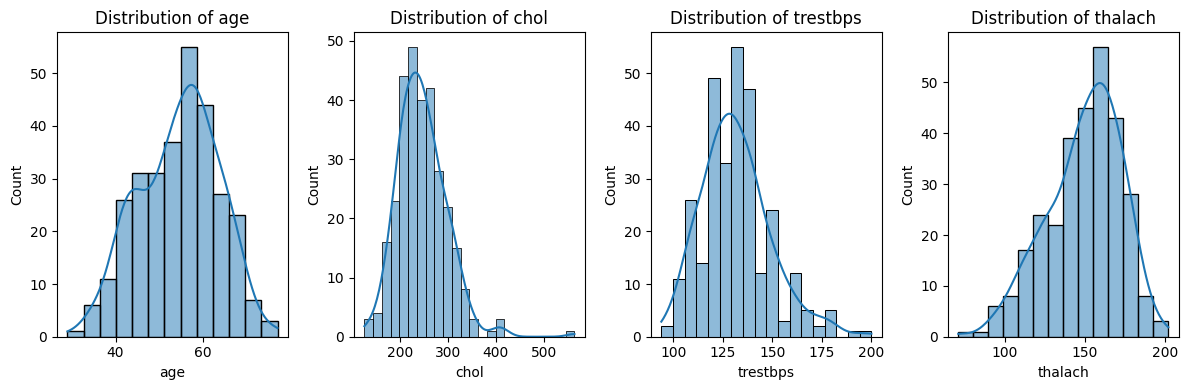

In [17]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(["age", "chol", "trestbps", "thalach"]):
    plt.subplot(1, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

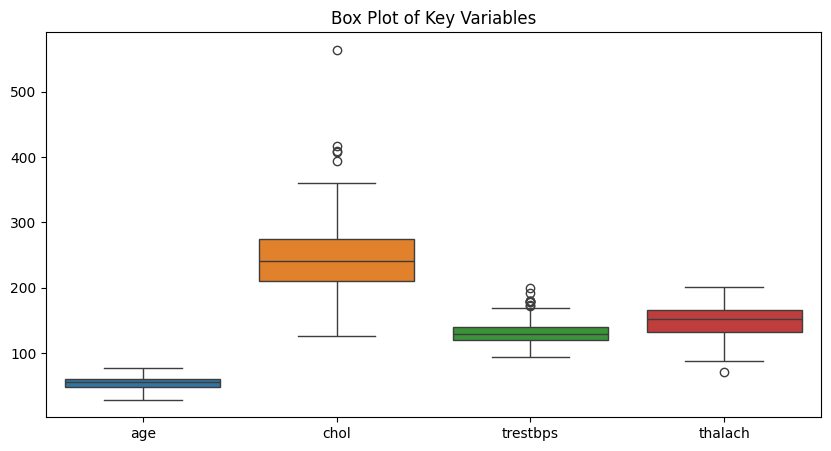

In [18]:
# Box Plot for Outlier Detection
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["age", "chol", "trestbps", "thalach"]])
plt.title("Box Plot of Key Variables")
plt.show()

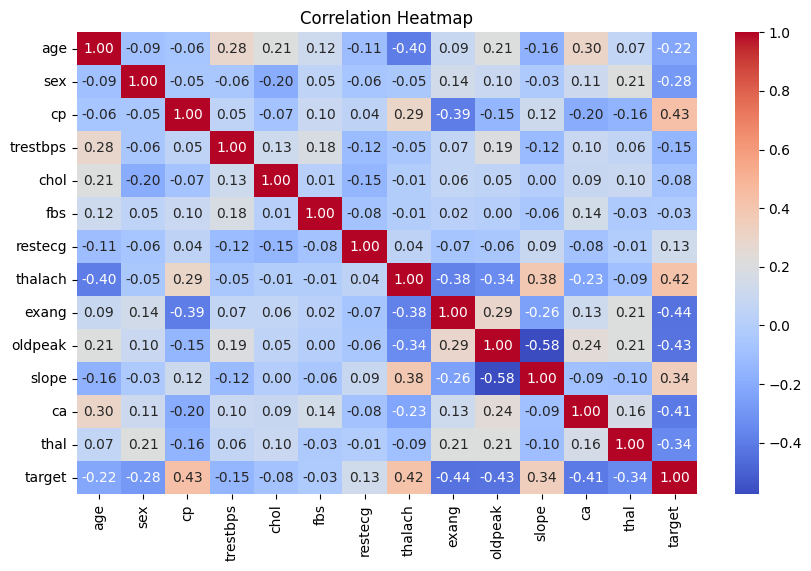

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

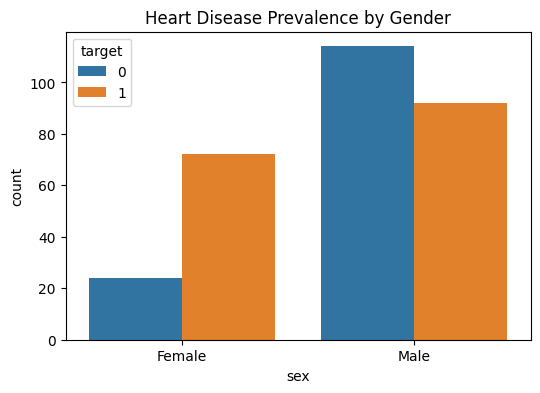

In [20]:
# Gender-Based Differences in Heart Disease
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex", hue="target")
plt.xticks([0, 1], ["Female", "Male"])
plt.title("Heart Disease Prevalence by Gender")
plt.show()

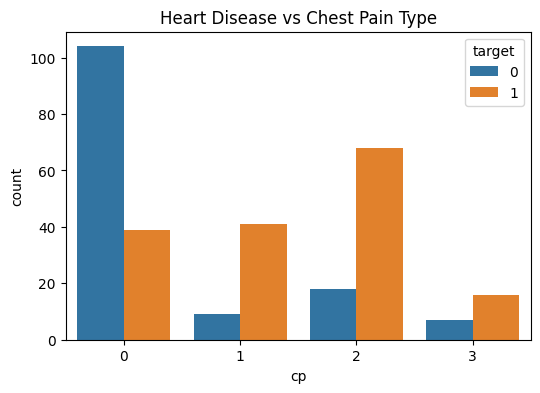

In [21]:
# Chest Pain Type vs Heart Disease
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="cp", hue="target")
plt.title("Heart Disease vs Chest Pain Type")
plt.show()

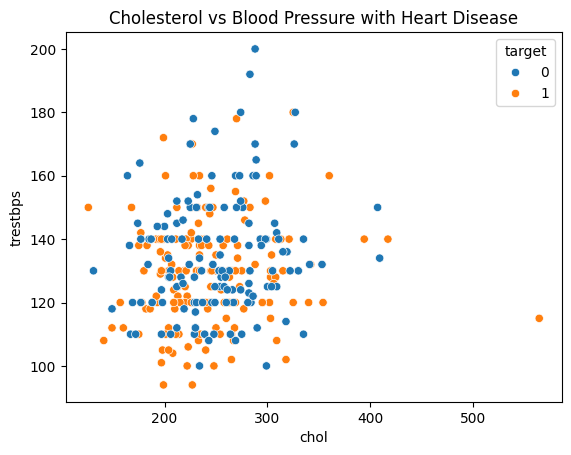

In [22]:
# Relationship Between Cholesterol, Blood Pressure, and Heart Disease
sns.scatterplot(data=df, x="chol", y="trestbps", hue="target")
plt.title("Cholesterol vs Blood Pressure with Heart Disease")
plt.show()

<Figure size 1200x600 with 0 Axes>

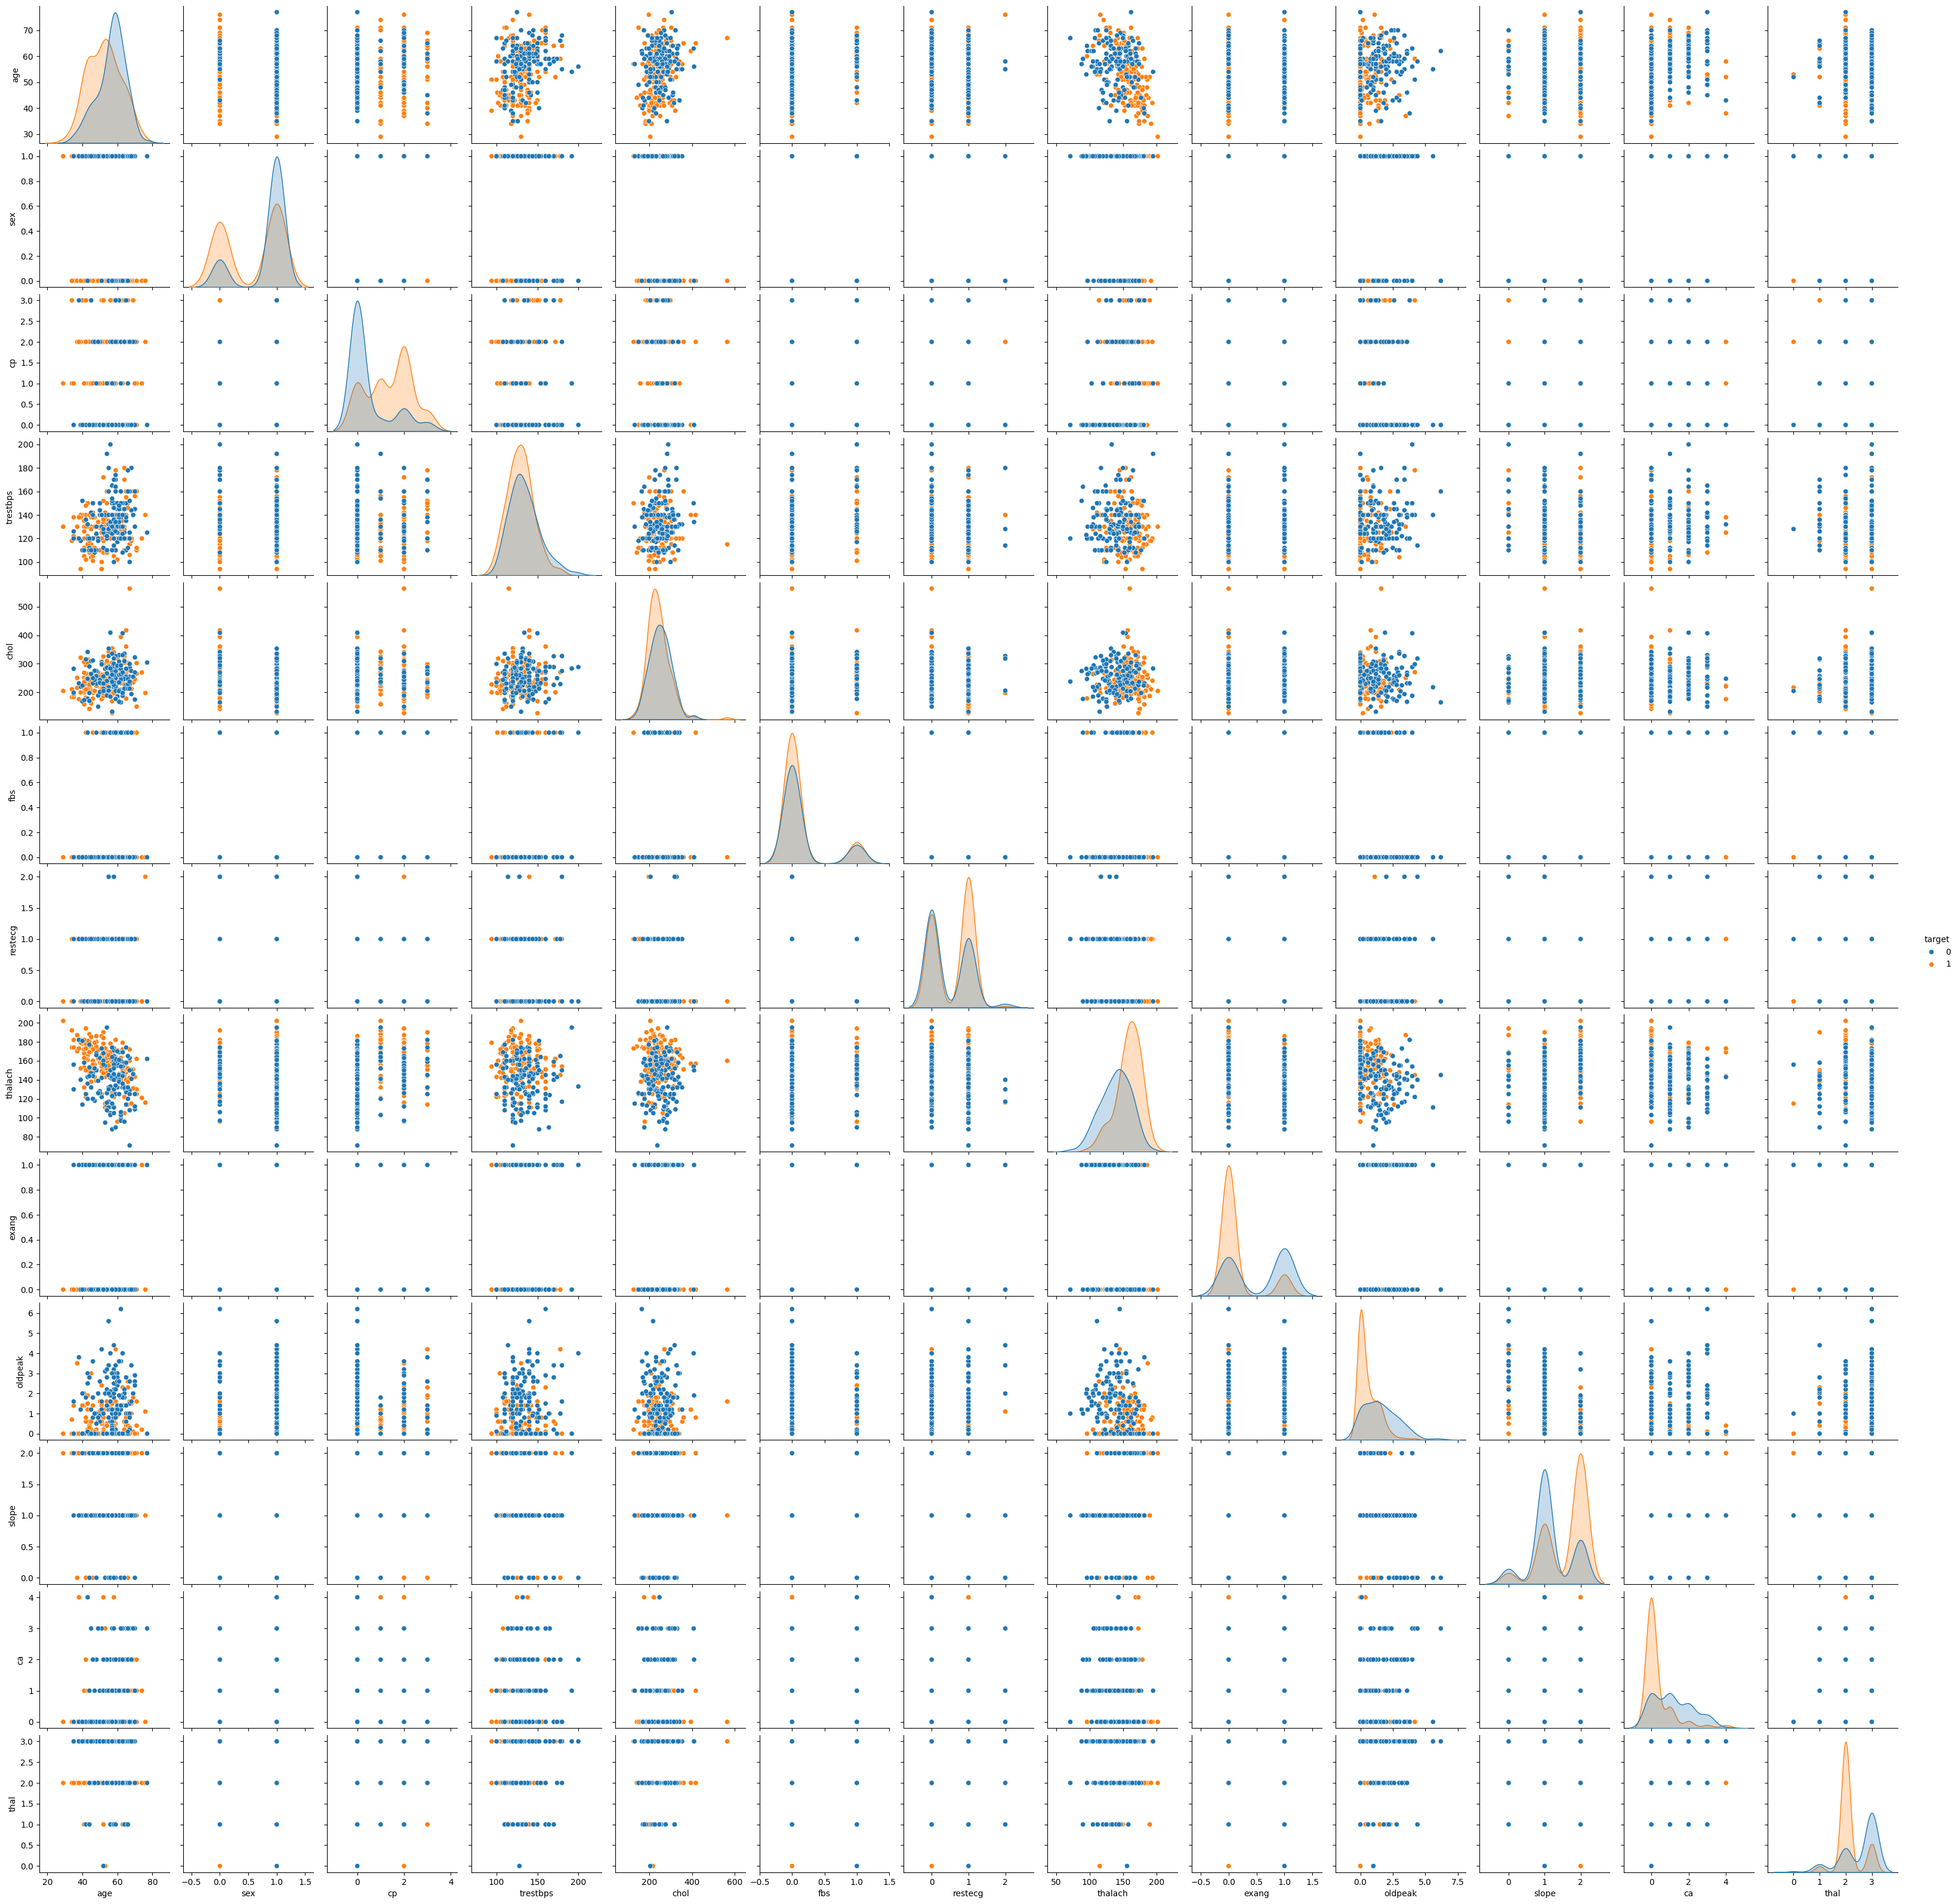

In [23]:
# Identify Potential Risk Factors
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue="target", diag_kind="kde")
plt.show()